# Kmena and ElbowMethod

Use k-mean to cluster customer vist frequency

[ref article](https://towardsdatascience.com/data-driven-growth-with-python-part-2-customer-segmentation-5c019d150444)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

/home/tingyuh/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# data cleaning
df = pd.read_csv('OnlineRetail.csv', 
                 encoding= 'unicode_escape', 
                 dtype = {'CustomerID': 'str'}) 
df = df[df.Country == 'France']
df['InvoiceDay'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%Y%m%d")
df['Revenue'] = df.Quantity * df.UnitPrice
df = df[['CustomerID', 'InvoiceDay','Revenue']].drop_duplicates()\
                                     .groupby('CustomerID')\
                                     .agg({'InvoiceDay': 'count',
                                           'Revenue': 'sum'})\
                                     .reset_index()\
                                     .rename(columns={'InvoiceDay': 'PurchaseFrequ'})
df.head(3)

,CustomerID,PurchaseFrequ,Revenue
0,12413,32,573.10
1,12437,150,3906.61
2,12441,5,84.45


## PurchaseFrequency

In [3]:
df.PurchaseFrequ.describe()

count     87.000000
mean      58.252874
std       72.414379
min        2.000000
25%       14.500000
50%       30.000000
75%       78.000000
max      422.000000
Name: PurchaseFrequ, dtype: float64

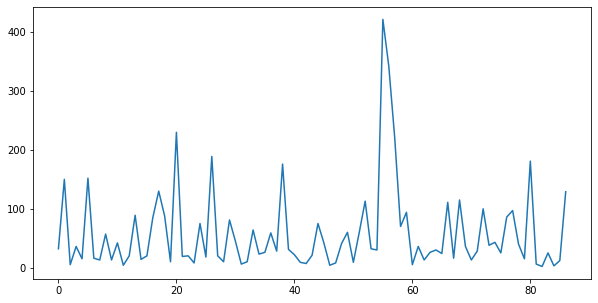

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df.PurchaseFrequ)

#plt.savefig("test.png")
#plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f822462b310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f822462bb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f822462a7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f822462d990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f822462df50>],
 'means': []}

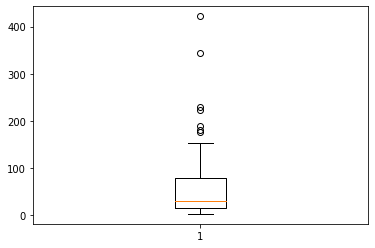

In [5]:
plt.boxplot(df.PurchaseFrequ)

In [6]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['PurchaseFrequ']])
    distortions.append(kmeanModel.inertia_)

from the graph we can see the distortion the best group should be 3-4

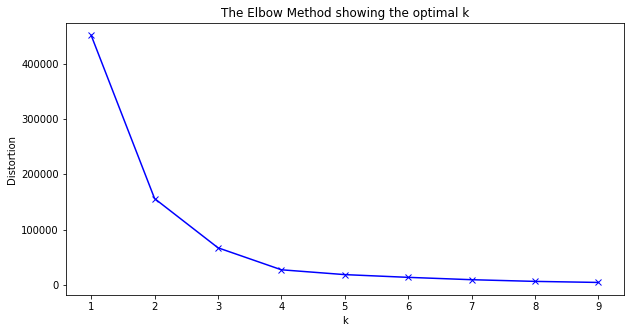

In [7]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
#build 3 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['PurchaseFrequ']])
df['purchasefreClus'] = kmeans.predict(df[['PurchaseFrequ']])
df.head(3)

,CustomerID,PurchaseFrequ,Revenue,purchasefreClus
0,12413,32,573.10,0
1,12437,150,3906.61,1
2,12441,5,84.45,0


In [9]:
df.groupby('purchasefreClus')['PurchaseFrequ'].describe()

,count,mean,std,min,25%,50%,75%,max
purchasefreClus,,,,,,,,
0,65.0,25.923077,18.786887,2.0,12.00,21.0,36.00,75.0
1,20.0,130.900000,46.734299,81.0,92.75,114.0,158.00,230.0
2,2.0,382.500000,55.861436,343.0,362.75,382.5,402.25,422.0


## revenue

In [10]:
df.Revenue.describe()

count       87.000000
mean      1492.324138
std       2597.977744
min      -3059.410000
25%        241.530000
50%        537.550000
75%       1829.045000
max      13589.070000
Name: Revenue, dtype: float64

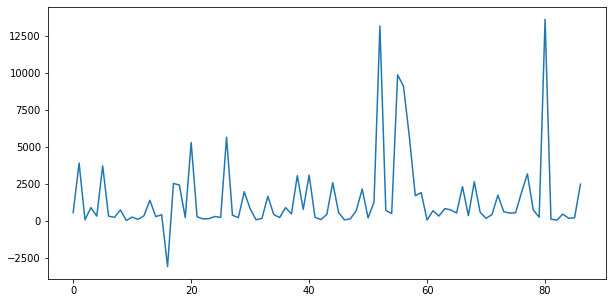

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df.Revenue)

#plt.savefig("test.png")
#plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8223f1dd10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8223f1d650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8223e80390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8223f14890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8223f14210>],
 'means': []}

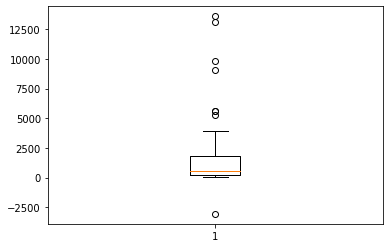

In [12]:
plt.boxplot(df.Revenue)

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['Revenue']])
    distortions.append(kmeanModel.inertia_)

from the graph we can see the distortion the best group should be 3-4

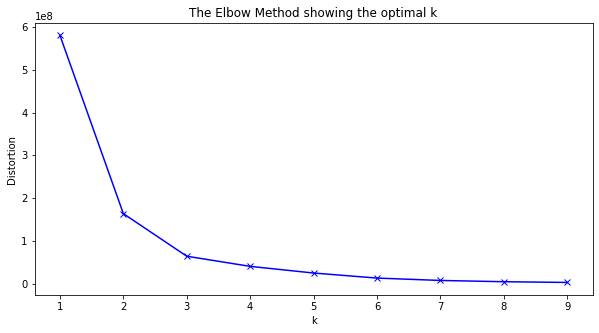

In [14]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
#build 3 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Revenue']])
df['RevenueClus'] = kmeans.predict(df[['Revenue']])
df.head(3)

,CustomerID,PurchaseFrequ,Revenue,purchasefreClus,RevenueClus
0,12413,32,573.10,0,1
1,12437,150,3906.61,1,0
2,12441,5,84.45,0,1


In [16]:
df.groupby('RevenueClus')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueClus,,,,,,,,
0,18.0,3139.186667,1237.801572,1911.63,2345.8375,2618.405,3583.1400,5650.31
1,65.0,425.703538,589.873493,-3059.41,210.6000,356.390,626.9800,1746.46
2,4.0,11414.027500,2281.212070,9079.37,9655.8350,11493.835,13252.0275,13589.07


# scatter plot

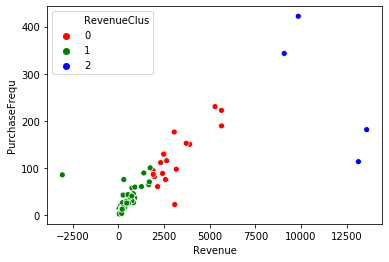

In [17]:
x = df.Revenue
y = df.PurchaseFrequ
sns.scatterplot(x=x, y=y, data=df,hue='RevenueClus',palette=['r','g','b'])

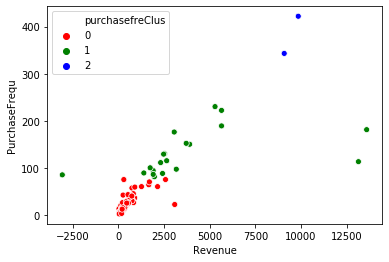

In [18]:
x = df.Revenue
y = df.PurchaseFrequ
sns.scatterplot(x=x, y=y, data=df,hue='purchasefreClus',palette=['r','g','b'])

In [19]:
# import numpy as np
# colors = np.where(df["RevenueClus"]=='0','r','-')
# colors[df["RevenueClus"]=='1'] = 'g'
# colors[df["RevenueClus"]=='2'] = 'b'
# plt.figure(figsize=(10,5))
# df.plot.scatter(x="Revenue",y="PurchaseFrequ",c=colors)
# plt.show()

# take both feature

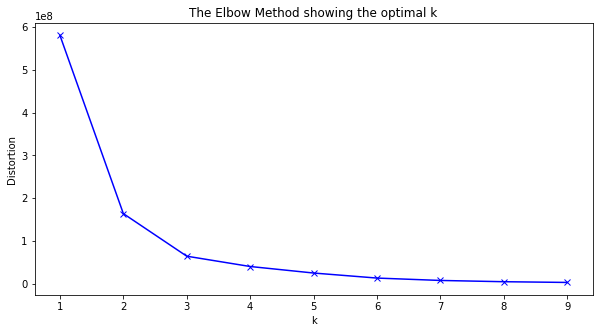

In [20]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['Revenue','PurchaseFrequ']])
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
#build 3 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Revenue','PurchaseFrequ']])
df['cluster'] = kmeans.predict(df[['Revenue','PurchaseFrequ']])
df.head(3)

,CustomerID,PurchaseFrequ,Revenue,purchasefreClus,RevenueClus,cluster
0,12413,32,573.10,0,1,0
1,12437,150,3906.61,1,0,2
2,12441,5,84.45,0,1,0


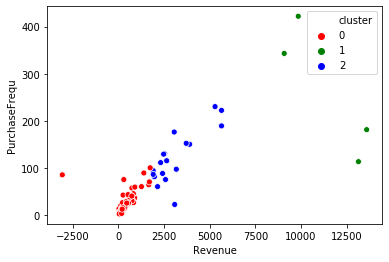

In [22]:
x = df.Revenue
y = df.PurchaseFrequ
sns.scatterplot(x=x, y=y, data=df,hue='cluster',palette=['r','g','b'])